
# Project: Investigate a Dataset (TMDB Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**:
In this project i will use TMDb movies dataset to analysis the data .
>
> This dataset have information about 10,000 Movies which include the revenue, the budget and user ratings and it consist of 21 colums such as i mentioned name some of columns before .

>"**This data collection can be used to answer the following questions:**"

1. Movies with the highest and lowest profits
2. Movies with the highest and lowest budgets 
3. The films with the highest and lowest earned revenues.
4.  Movies with the longest and shortest runtime values
5. Mean runtime of all the movies.
6. In which year did we have the highest number of successful movies

 ----------------------------------------------------------------------
              7. Most Successful genres 
              8. Most frequent cast 
              9. Average budget
             10. Average revenue
             11. Average duration of the movie 



In [1]:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# import the package
import pandas as pd
import numpy as np
import csv
%matplotlib inline
import time 
from datetime import datetime
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> After reviewing the dataset and proposed questions for analysis, we will keep only relevant data and delete irrelevant data to make our estimation simple and understandable

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Obsevations from the data set**:

1.) There is no mention of a monetary unit in the dataset. So, for my research, I'll use the dollar because it's the most commonly used foreign currency. 
2.) Since each movie's vote count is different, we cannot directly determine the success of the movies based on the average vote count.

### Data Cleaning (Delete the useless information from the dataset!)
    1.we should remove unused column such as id, imdb_id,votecount, production compant, keywords and homepage

    2.Some movies in the database have no budget or revenues, implying that their worth has not been recorded; thus, those entries would be removed. 
    3.Removing duplication in the line (if any).
    4.In the runtime column, replace zero with NAN.
    5.Converting the release date column to date format. 
    6.Modifying the format of the budget and revenue columns

## 1.Removing Unused columns

In [3]:
#creating a list of column to be deleted
deleted_columns=['id', 'imdb_id', 'homepage', 'keywords', 'overview', 'production_companies', 'popularity', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']

df=df.drop(deleted_columns, 1)
df.head(4)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015


## 2.Removing zeros from the budget and revenue columns

In [4]:
profit_list=['budget', 'revenue']
#replace 0 to NAN
df[profit_list]=df[profit_list].replace(0, np.NAN)
#Remove Rows contian NAN
df.dropna(subset=profit_list, inplace= True )
Rows, Columns= df.shape
print('After removing such entries, we now have only {} of movies.'.format(Rows-1))

After removing such entries, we now have only 3854 of movies.


## 3. Romving Duplicates

In [5]:
#check if we have duplicates 
sum(df.duplicated())
# drop duplicates
df.drop_duplicates(inplace=True)
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())
Rows, col= df.shape
print('There are {} enteries of movies and and {} columns in the dataset' .format(Rows-1, col))

There are 3853 enteries of movies and and 10 columns in the dataset


## 4. In the runtime column, replace zero with NAN

In [6]:
df['runtime']=df['runtime'].replace(0, np.NAN)

## 5.Converting the release date column to date format.

In [7]:
df.release_date=pd.to_datetime(df['release_date'])

In [8]:
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


## 6. Modifying the format of the budget and revenue columns

In [9]:
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [10]:
df[profit_list]= df[profit_list].applymap(np.int64)
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


# <a id='eda'></a>
## Exploratory Data Analysis

>Calclute the profit for each movie


In [12]:
#use insert func to calcluate profite from budget and revenues 
df.insert(2,'profit',df['revenue']-df['budget'])
# showing the changes in the dataset
df.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


## Research Question 1 : Movies with the highest and lowest profits¶


In [13]:
maximum = df['profit'].idxmax()
maximum_value=pd.DataFrame(df.loc[maximum])
minimum= df['profit'].idxmin()
min_value=pd.DataFrame(df.loc[minimum])
extreme=pd.concat([maximum_value, min_value], axis=1)
    
extreme



,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Column with id 1386 reveals the highest earned profit i.e 2544505847 . 

Whereas the column with id 2244 displays the lowest received benefit i.e -413912431

### Research Question 2  (Movies with the highest and lowest budgets)

In [14]:
maximum = df['budget'].idxmax()
maximum_value=pd.DataFrame(df.loc[maximum])
minimum= df['budget'].idxmin()
min_value=pd.DataFrame(df.loc[minimum])
extreme=pd.concat([maximum_value, min_value], axis=1)
    
extreme


,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


the largest budget is '(425000000 dollar)' Which his id is 2244 and the column with id 2618 has the lowest budget which it was 1 $

### Research Question 3 (The films with the highest and lowest earned revenues)

In [15]:
maximum = df['revenue'].idxmax()
maximum_value=pd.DataFrame(df.loc[maximum])
minimum= df['revenue'].idxmin()
min_value=pd.DataFrame(df.loc[minimum])
extreme=pd.concat([maximum_value, min_value], axis=1)
    
extreme


,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


we noted the largest revenue for a movie with id 1386 (Avatar) which it is 2781505847 and the lowest revenue  for (Shattered Glass)

### Research Question 4 (Movies with the longest and shortest runtime values)

In [16]:
maximum = df['runtime'].idxmax()
maximum_value=pd.DataFrame(df.loc[maximum])
minimum= df['runtime'].idxmin()
min_value=pd.DataFrame(df.loc[minimum])
extreme=pd.concat([maximum_value, min_value], axis=1)
    
extreme


,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Research Question 5 (Mean runtime of all the movies)

In [17]:
df['runtime'].mean()

109.22029060716139

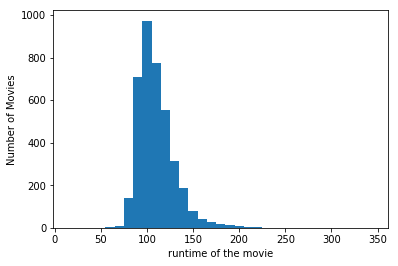

In [18]:
shape = np.arange(min(df['runtime']), max(df['runtime']) + 10, 10)
plt.hist(df['runtime'], bins = shape, density=False)
plt.ylabel('Number of Movies')
plt.xlabel('runtime of the movie')
plt.show()

The above-mentioned graph's distribution is positively distorted or right skewed! The majority of the films run between 80 and 115 minutes. Almost 1000 movies 

**Let's dig further into the movie's runtime using various types of plots, such as the Box Plot and the Data Point Plot.**

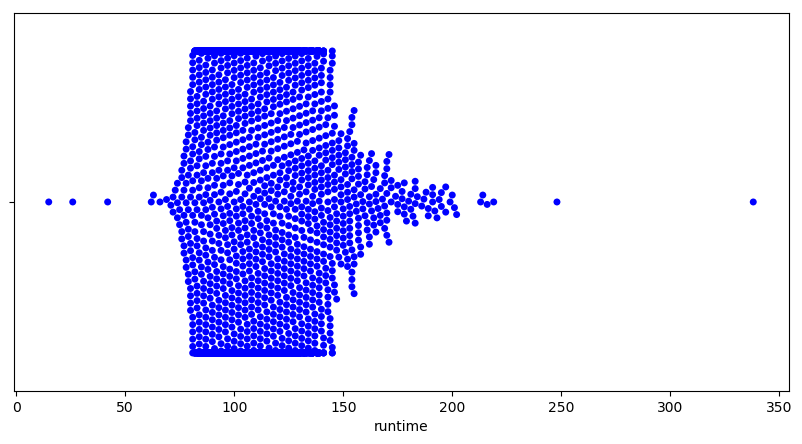

In [19]:
import seaborn as sns
plt.figure(figsize=(10,5), dpi = 100)
sns.swarmplot(df['runtime'], color = 'blue')
plt.show()

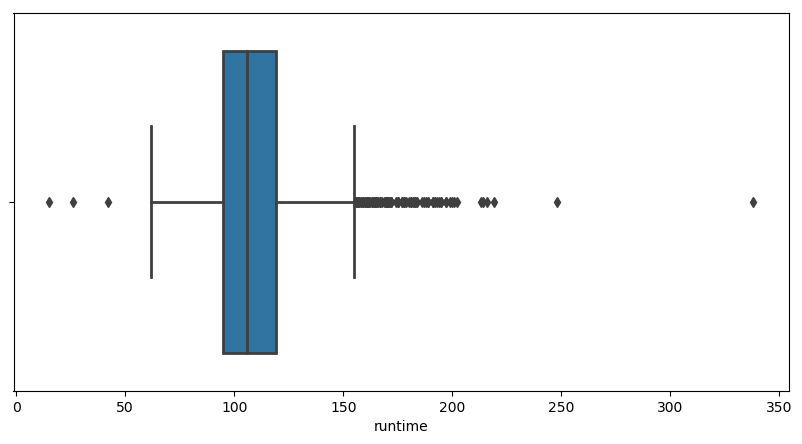

In [20]:
plt.figure(figsize=(10,5), dpi = 100)
sns.boxplot(df['runtime'], linewidth = 2)
plt.show()

The plot generated above depicts the entire distribution of movie runtime by plotting the points against their respective positions in the distribution. 

Coming to our second plot, the box-plot, it gives us a general understanding of how evenly distributed the distribution is in terms of movie runtime. If you pay attention to the storyline, you'll see that we even get the outliners from her.

### Research Question 6 (In which year did we have the highest number of successful movies)

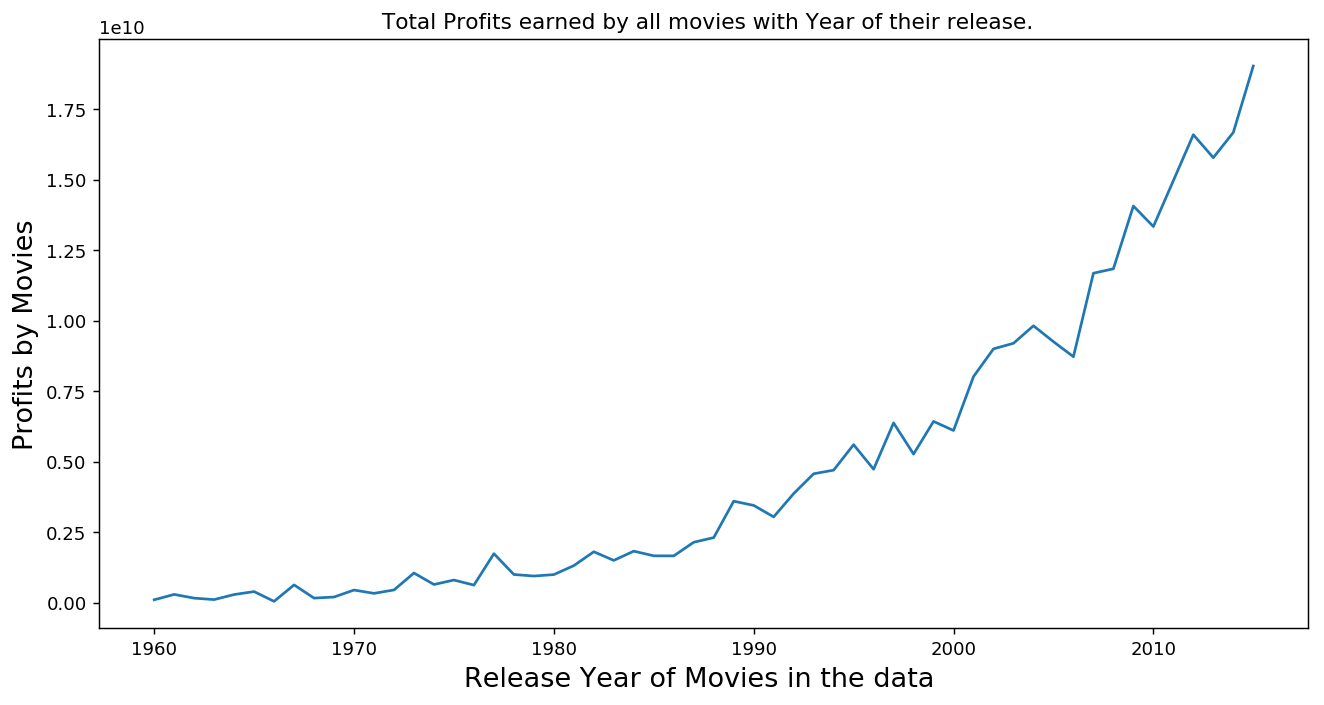

In [21]:
year_profit = df.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data ', fontsize = 15)
plt.ylabel('Profits by Movies', fontsize = 15)
plt.title(' Total Profits earned by all movies with Year of their release.')
plt.plot(year_profit)
plt.show()

In [22]:
#to know which year made higest profit
year_profit.idxmax()

2015

In [23]:
#to know which year made higest profit
year_profit.idxmin()

1966

Before proceeding, we must clean our data once more. We can only take into account films that have made a substantial return. 

But let's round this up to 45 million dollars.

In [24]:
profits_data = df[df['profit'] >= 45000000]
profits_data.index = range(len(profits_data))

#we will start from 1 instead of 0
profits_data.index = profits_data.index + 1
profits_data.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [25]:
#discover no.of rows in new data 
len(profits_data)


1422

our dataset is now 1422 from 3583 

### Research Question 7 (Most Successful genres)

In [26]:
df['genres'].value_counts()

Drama                                                245
Comedy                                               233
Drama|Romance                                        107
Comedy|Romance                                       104
Comedy|Drama|Romance                                  91
Comedy|Drama                                          88
Horror|Thriller                                       81
Horror                                                58
Drama|Thriller                                        48
Action|Thriller                                       39
Crime|Drama|Thriller                                  37
Drama|Comedy                                          36
Comedy|Family                                         32
Action|Crime|Thriller                                 31
Drama|History                                         28
Drama|Crime                                           27
Crime|Drama                                           26
Thriller                       

In [27]:
def value(column):
    data = profits_data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count
count = value('genres')
count.head()

Drama        519
Comedy       519
Action       489
Thriller     432
Adventure    394
dtype: int64

Let's look at a graphic representation of the data we've gathered so far.

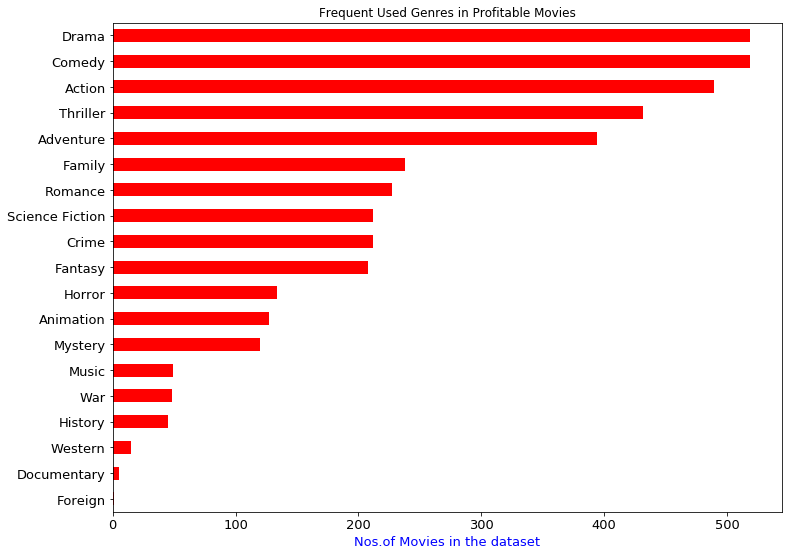

In [28]:
#Since we have data in the same format, let's plot the points in descending order from top to bottom.
count.sort_values(ascending = True, inplace = True)
fgenres = count.plot.barh(color = 'red', fontsize = 13)
fgenres.set(title = 'Frequent Used Genres in Profitable Movies')
fgenres.set_xlabel('Nos.of Movies in the dataset', color = 'blue', fontsize = '13')
fgenres.figure.set_size_inches(12, 9)

plt.show()

### Research Question 8 : Most Frequent Cast

In [29]:
# we will use the previous function to answer this question 
count_cast = value('cast')
count_cast.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             23
Cameron Diaz          22
Sylvester Stallone    21
dtype: int64

As expeceted Tom is on top with 27 then prad pitt with 25

### Research Question 9 : Average Budget

In [30]:
#define a function 
def avg(column):
    return profits_data[column].mean()

In [31]:
avg('budget')

58754889.933192685

As a result, films with profits of 45 million dollar or more had an average budget of 58 million dollar

### Research Question 9 : Avarage Revenue

In [32]:
avg('revenue')

244571768.41209564

As a result, films with profits of 45 million dollar or more have an average revenue of 244 million dollars.

In [33]:
avg('runtime')

113.34317862165963

As a result, movies with earnings of 45 million dollar or more have an average run time of 113 minutes.

<a id='conclusions'></a>
## Conclusions

>This was a fascinating data analysis. We discovered some very fascinating movie facts. Following this study, we can draw the following conclusions:
In order for a film to be good, the following conditions must be met:
1. The average budget should be about 58 million dollars.
2. The film's average running time must be 113 minutes.
3. Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, and Cameron Diaz should all be in the cast.
4. The genre must be one of the following: action, adventure, thriller, comedy, or drama.

By doing all of this, the film may become a success and receive an estimated revenue of about 244 million dollars.

> **limitations**: Limitations: This study was conducted using films that made a significant profit of about 45 million. This might not be entirely error-free, but by following these suggestions, one may increase the likelihood of a film being a success. Furthermore, we are unsure whether the information given to us is complete, correct, and up to date. As previously stated, the budget and revenue columns lack currency units; it is likely that various movies have budgets in different currencies depending on the country in which they are made. As a result, there is a discrepancy here, which could render the whole analysis incorrect. Dropping the rows with missing values had an impact on the overall analysis as well